<a href="https://colab.research.google.com/github/vans1836/ML_LAB/blob/main/Excercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# Define the column names based on the dataset documentation
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
    'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'label'
]

# Load the dataset with column names
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [2]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = data.drop(columns=['label'])
y = data['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import Isomap, MDS

# Apply SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 16 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

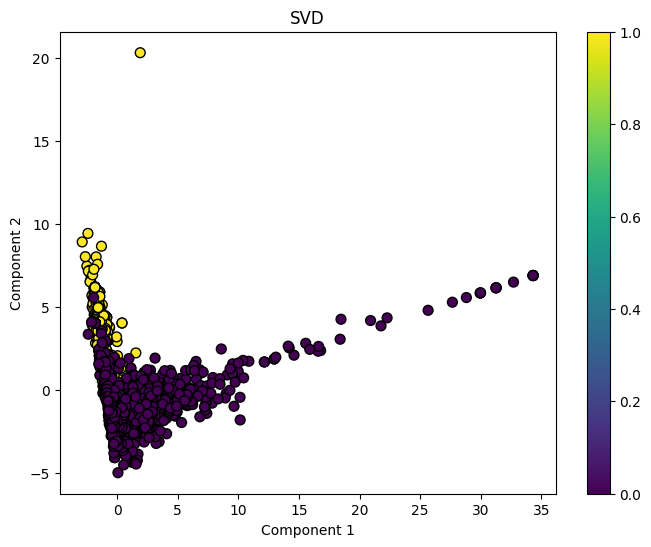

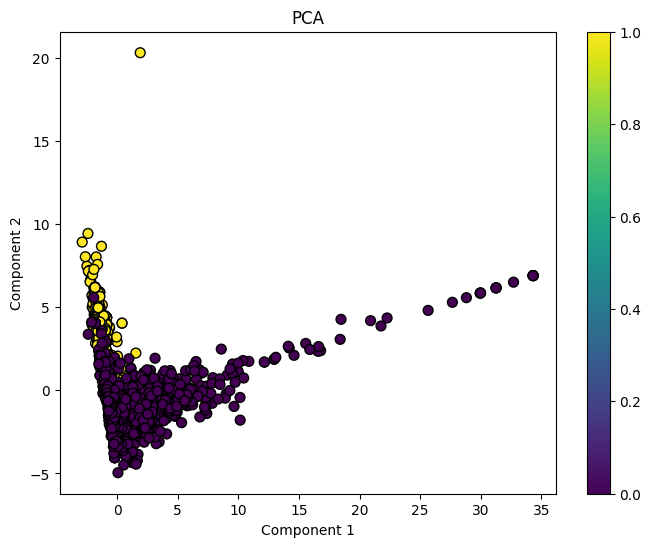

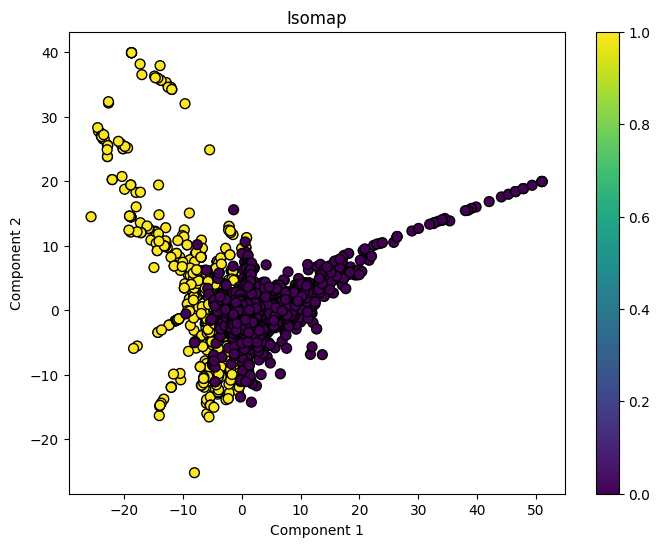

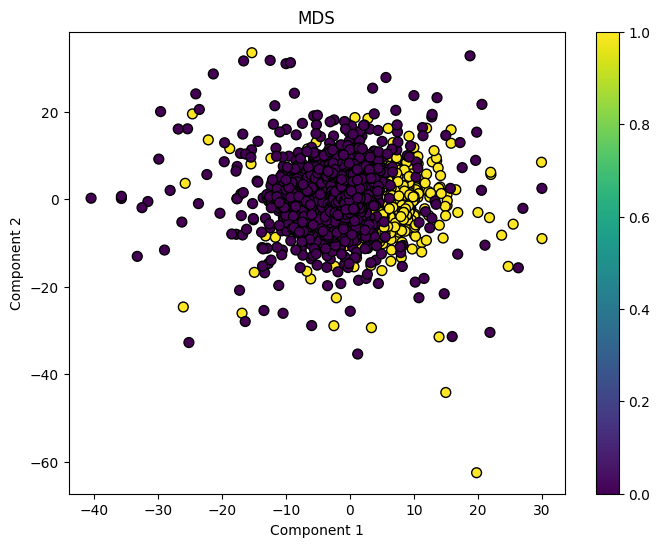

In [4]:
import matplotlib.pyplot as plt

# Function to plot the results
def plot_2d(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar()
    plt.show()

# Plot the results
plot_2d(X_svd, y, 'SVD')
plot_2d(X_pca, y, 'PCA')
plot_2d(X_isomap, y, 'Isomap')
plot_2d(X_mds, y, 'MDS')

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to evaluate clustering
def evaluate_clustering(X):
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    return score

# Evaluate each method
svd_score = evaluate_clustering(X_svd)
pca_score = evaluate_clustering(X_pca)
isomap_score = evaluate_clustering(X_isomap)
mds_score = evaluate_clustering(X_mds)

print(f'SVD Silhouette Score: {svd_score}')
print(f'PCA Silhouette Score: {pca_score}')
print(f'Isomap Silhouette Score: {isomap_score}')
print(f'MDS Silhouette Score: {mds_score}')

SVD Silhouette Score: 0.8904858999224924
PCA Silhouette Score: 0.8904860456690384
Isomap Silhouette Score: 0.678171869255203
MDS Silhouette Score: 0.27359770497062497


In [6]:
# Create a summary table
results = pd.DataFrame({
    'Method': ['SVD', 'PCA', 'Isomap', 'MDS'],
    'Silhouette Score': [svd_score, pca_score, isomap_score, mds_score]
})

print(results)

   Method  Silhouette Score
0     SVD          0.890486
1     PCA          0.890486
2  Isomap          0.678172
3     MDS          0.273598
